<a href="https://colab.research.google.com/github/sarodeshreyash/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system. 
#It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.

# **1. Importing Libraries**

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read data

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = '/content/drive/MyDrive/Almabetter/capstone 1/Play Store Data.csv'
df1 = pd.read_csv(file_path)

# **2. Overview Of Data**

In [49]:
# Reading the first five rows of the Data set 
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
# Reading the tail of Data set which is last 5 rows
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [51]:
# Printing The Shape oF Data Set
df1.shape

(10841, 13)

**Play store data has 10841 rows and 13 columns**

**Each row represent a app that means we have a data of 10841 apps**

In [52]:
# Printing the information of Dataset to get the better idea of Data  
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The info() function is used to print a brief summary of a DataFrame which prints the shape of data i.e. number of rows(entries) and number of columns.This method prints information about a DataFrame including the index dtype and column dtypes, non-null counts and memory usage.


In [53]:
# Printing the Statistics summary
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

# **3. Data Cleaning**
**We will mostly be working with these columns: "Rating", "Size", "Installs", "Price". we have to deal with Null values, special characters, data type of these columns**

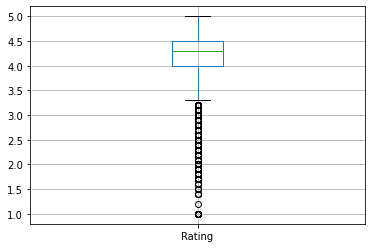

In [63]:
# lets check 'Rating' column if there any outliers
df1.boxplot()

From above observasion we can see there are values which are greater than 5. The rating of any apps has to be max 5 not greater than it so lets try to find out this outlier.

In [57]:
# Checking how many outliers are there in Rating column 
df1[df1.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [58]:
# The category, Rating and Reviews Column have irregular data so dropping this above row 
df1.drop([10472], inplace = True)

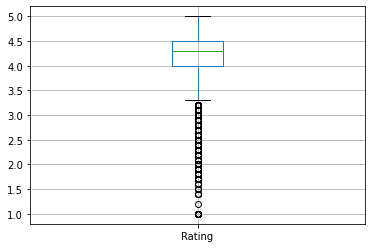

In [59]:
# check- do we successfully droped the outlier 
df1.boxplot()

In [64]:
# checking the missing values in the dataframe
df1.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# counting the number of missing values in the dataframe
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

**We can see that there are 1474 values are null in 'Rating' column and 1 , 8 , 2 are in 'Type' , 'Current Ver' , 'Android Ver' respectively**

**By seeing above data we can conclude that  null values in the data so to achieve more accuracy we need to drop the null values from our data**

In [69]:
Rating_median=df1['Rating'].median()
print(f"The median of Rating Column {Rating_median}")

Rating_mean=df1['Rating'].mean()
print(f"The mean of Rating Column {Rating_mean}")

The median of Rating Column 4.3
The mean of Rating Column 4.191757420456972


The Median of Rating Column comes to be 4.3

The mean of Rating Column comes to be 4.2

There is not much difference between mean and median, so we replace all the null values with median because it shows that 50% of apps have more than 4.3.

In [70]:
df1['Rating'].fillna(value=Rating_median,inplace=True)

In [72]:
# lets check Rating column has any null value
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

* **Lets check other columns** 

In [74]:
# size column
df1['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

*We can see that in size column contain values having 'M' and 'K' stands for MB and KB respectively. to use this values for analysis we need to remove that and make values to single unit*

In [75]:
df1['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

*In price column '$' is a special character we have to drop that*

In [76]:
df1['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

*We can see that ',' and '+' are appeared in installs column*

In [80]:
# Replace all the unwanted character to convert datatye to numeric 
def remove_unwanted(value):
  """This function takes a string and replace the following characters if present, 'NaN' 'M' , 'k' , '+' , ',' , '$' """
  if ',' in value:
    value = value.replace(',','')
  if '+' in value:
    value = value.replace('+','')
  if '$' in value:
    value = value.replace('$','')
  if 'M' in value:
    value = str(int(float(value.replace('M',''))*1000000))
  if 'k' in value:
    value = str(int(float(value.replace('k',''))*1000))
  if 'NaN' in value:
    value = '0'
  else:
    pass
  return value

In [81]:
#Changing the 'Reviews' column values into valid numeric values
df1['Reviews'] = pd.to_numeric(df1['Reviews'])

#Changing the 'Size' column values into valid numeric values
df1['Size'] = df1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df1['Size'] = pd.to_numeric(df1['Size'].map(lambda x: remove_unwanted(x)))

#Changing the 'Installs' column values into valid numeric values
df1['Installs'] = pd.to_numeric(df1['Installs'].map(lambda x: remove_unwanted(x)))

#Changing the 'Price' column values into valid numeric values
df1['Price'] = pd.to_numeric (df1['Price'].map(lambda x:remove_unwanted(x)))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  int64  
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


**Duplicate values**

In [82]:
# Lets check if there any duplicate values in data
df1.duplicated().value_counts()

False    10357
True       483
dtype: int64

*In the data 483 duplicate rows, To get accurate analysis we have drop these rows*

In [84]:
df1.drop_duplicates(subset='App',keep='first',inplace=True)   # drop duplicate values permanently

In [88]:
# lets check if we drop duplicates or not
df1.duplicated().value_counts()

False    9659
dtype: int64

**We have successfully drop the duplicate rows**

# **we are done with data cleaning**
* Remove outliers
* Fill null values
* Remove duplicate data

In [91]:
# Lets see the random rows from data as sample
df1.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10634,Florida Map offline,TRAVEL_AND_LOCAL,4.6,8,18000000,1000,Free,0.00,Everyone,Travel & Local,"June 22, 2018",1.73,4.3 and up
755,C Programming,EDUCATION,4.3,22251,1800000,1000000,Free,0.00,Everyone,Education,"June 28, 2015",3.0,2.3 and up
181,English-Myanmar Dictionary,BOOKS_AND_REFERENCE,4.4,8788,10000000,1000000,Free,0.00,Everyone,Books & Reference,"July 28, 2018",2.5.3,4.0 and up
4516,myQ,TOOLS,3.6,3642,29000000,100000,Free,0.00,Everyone,Tools,"July 23, 2018",3.2.0,4.0.3 and up
10675,Circle Colors Pack-FN Theme,PERSONALIZATION,4.2,6,89000,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up
5874,AZ Camera - Manual Pro Cam,PHOTOGRAPHY,3.4,2332,1600000,100000,Free,0.00,Everyone,Photography,"August 28, 2015",2.2,5.0 and up
4511,Q-See QC View,TOOLS,3.1,657,21000000,100000,Free,0.00,Everyone,Tools,"January 19, 2018",3.49.0202,4.0.3 and up
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1200000,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34000000,10000000,Free,0.00,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
5511,AQ Dentals,HEALTH_AND_FITNESS,4.3,0,12000000,10,Free,0.00,Everyone,Health & Fitness,"December 22, 2017",1.0.1,4.1 and up


# **Data is now ready to analysis**

**1. find out top 5 and bottom 5 categories according to number of apps**

In [104]:
top_five_category = df1['Category'].value_counts(ascending=False).head(5).reset_index()
top_five_category

,index,Category
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [102]:
bottom_five_category = df1['Category'].value_counts(ascending=True).head(5).reset_index()
bottom_five_category

,index,Category
0,BEAUTY,53
1,COMICS,56
2,PARENTING,60
3,ART_AND_DESIGN,64
4,EVENTS,64


**2. find out **